In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_2.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

10/07/2020 22:39:27 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 22:39:36 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 22:39:45 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 22:39:54 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 22:40:04 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.g

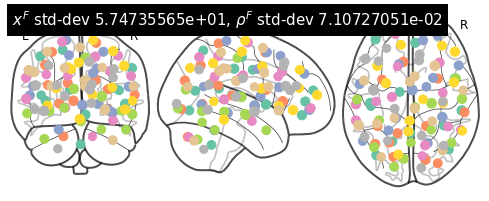

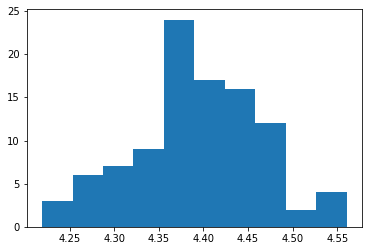

(<nilearn.plotting.displays.OrthoProjector at 0x7fb6e0229c10>,
 tensor([[-4.1135e+01, -2.2684e+01,  1.0956e+01],
         [ 5.4396e+01, -2.7119e+01,  3.9390e+01],
         [ 3.5705e+01, -4.3121e+01,  1.8456e+01],
         [ 5.5630e+00,  4.4077e+01, -9.5457e+00],
         [-1.0759e+01, -7.6830e+00,  3.8245e+01],
         [-1.8459e+01, -5.9725e+01,  5.8538e+01],
         [ 4.9493e-01, -5.1102e+01, -4.0816e+01],
         [ 4.0878e+01, -6.8158e+01,  1.6136e+01],
         [-3.5494e+01, -7.4344e+01, -4.4810e+00],
         [ 4.7416e+01,  6.4074e+00,  1.7673e+00],
         [-4.1912e+01, -1.9208e+01,  5.1818e+01],
         [-3.6276e+01,  4.7626e+01,  4.8583e+00],
         [-1.0897e+01,  5.5875e+01,  1.6540e+01],
         [ 2.9303e+01,  6.4150e+00,  1.7143e+01],
         [-2.1838e+01, -6.0804e+01,  2.1143e+00],
         [-1.3169e+01, -5.1142e+01,  2.3724e+01],
         [-2.9481e+01,  5.4652e+00,  5.6395e+01],
         [ 2.9246e+01, -8.2726e+01, -3.1014e+00],
         [-3.4104e+01, -4.3764e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=affvids_db.inference_filter(training=True))

10/07/2020 22:49:58 [Epoch 1] (17274ms) Posterior free-energy 6.30047539e+10 = KL from prior 2.08947800e+07 - log-likelihood -6.29838643e+10
10/07/2020 22:49:58 Saving checkpoint...
10/07/2020 22:50:16 [Epoch 2] (17189ms) Posterior free-energy 6.11273032e+10 = KL from prior 1.13029890e+07 - log-likelihood -6.11159859e+10
10/07/2020 22:50:32 [Epoch 3] (16340ms) Posterior free-energy 5.96940800e+10 = KL from prior 8.11254250e+06 - log-likelihood -5.96859617e+10
10/07/2020 22:50:48 [Epoch 4] (16373ms) Posterior free-energy 5.86704036e+10 = KL from prior 5.04244600e+06 - log-likelihood -5.86653491e+10
10/07/2020 22:51:05 [Epoch 5] (16390ms) Posterior free-energy 5.79507118e+10 = KL from prior 3.48477025e+06 - log-likelihood -5.79472302e+10
10/07/2020 22:51:21 [Epoch 6] (16421ms) Posterior free-energy 5.73940695e+10 = KL from prior 2.35416425e+06 - log-likelihood -5.73917266e+10
10/07/2020 22:51:38 [Epoch 7] (16441ms) Posterior free-energy 5.69822495e+10 = KL from prior 1.80835850e+06 - log

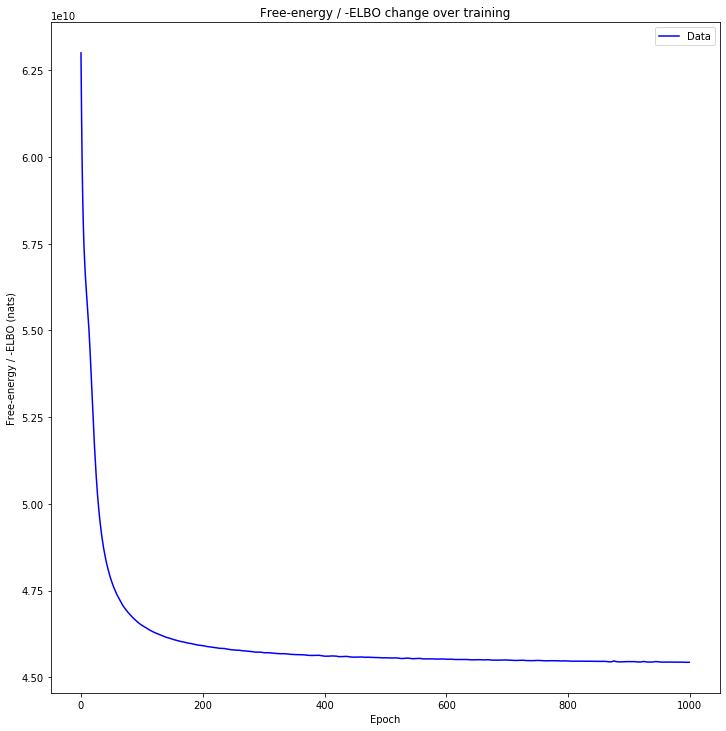

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

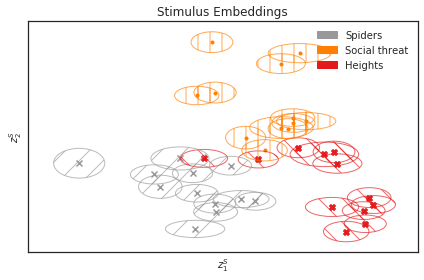

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

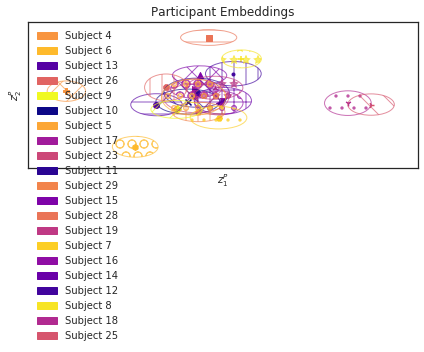

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

10/08/2020 03:25:01 Plotting factors for Participant 26, run 1


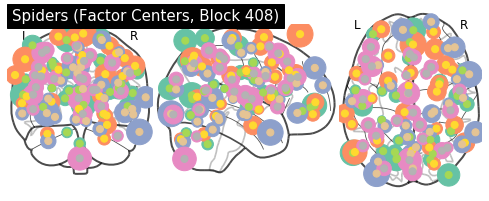

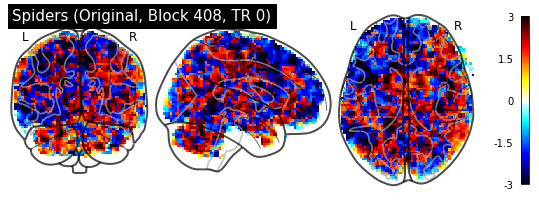

10/08/2020 03:25:05 Reconstruction Error (Frobenius Norm): 1.45598572e+02 out of 1.28150427e+03


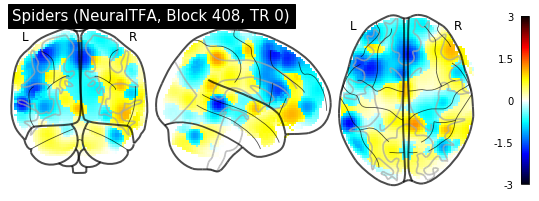

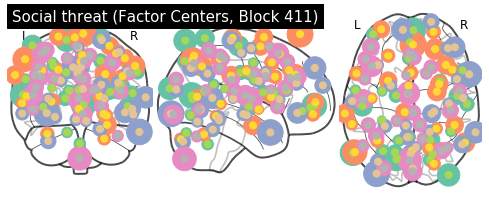

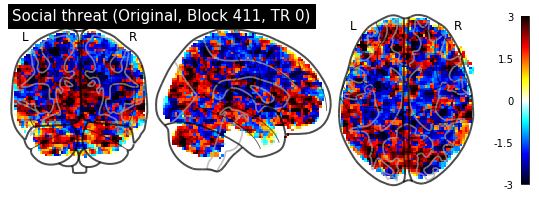

10/08/2020 03:25:10 Reconstruction Error (Frobenius Norm): 1.82408829e+02 out of 1.41492126e+03


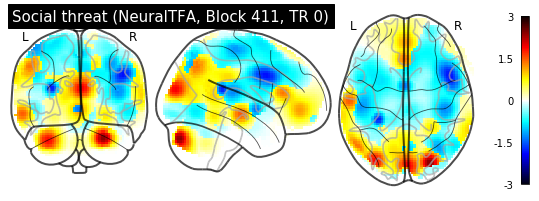

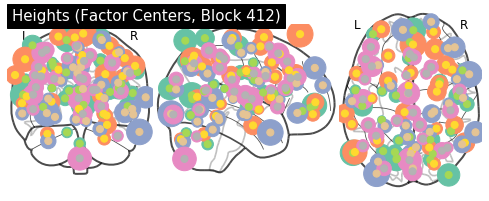

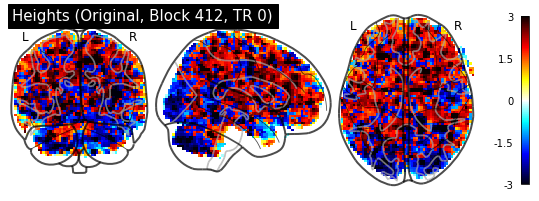

10/08/2020 03:25:14 Reconstruction Error (Frobenius Norm): 1.87698380e+02 out of 1.33934863e+03


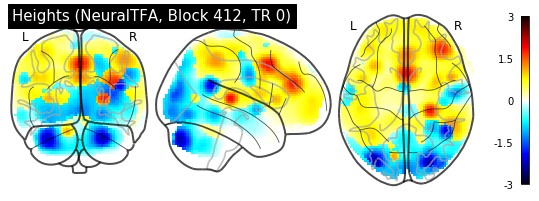

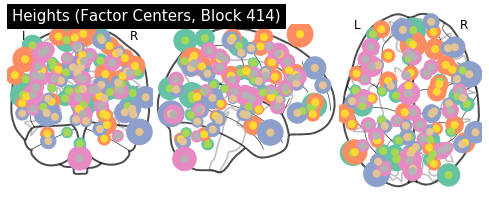

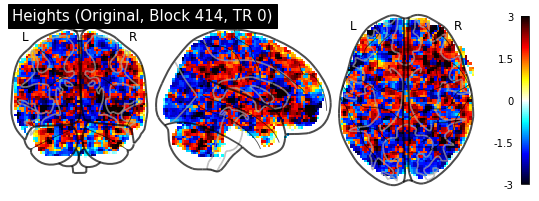

10/08/2020 03:25:18 Reconstruction Error (Frobenius Norm): 1.64200958e+02 out of 1.25852905e+03


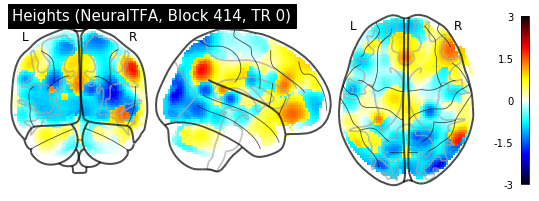

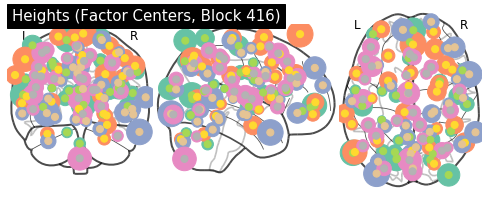

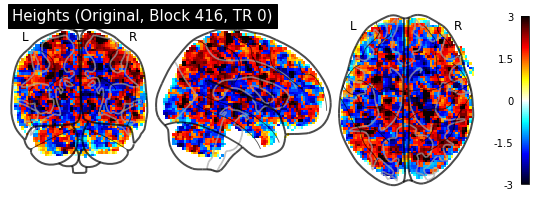

10/08/2020 03:25:23 Reconstruction Error (Frobenius Norm): 1.64272461e+02 out of 1.38264185e+03


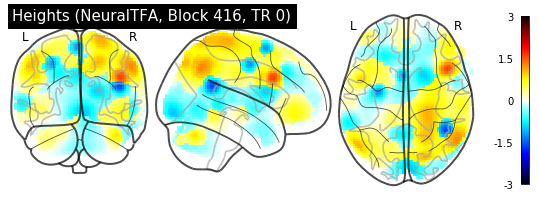

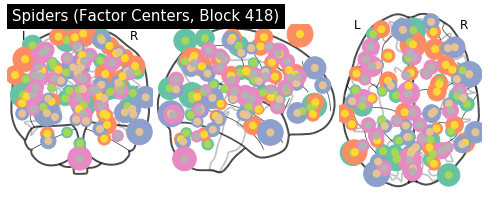

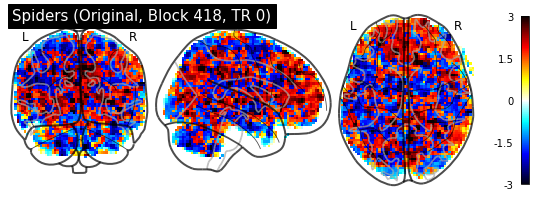

10/08/2020 03:25:27 Reconstruction Error (Frobenius Norm): 1.47249466e+02 out of 1.22198071e+03


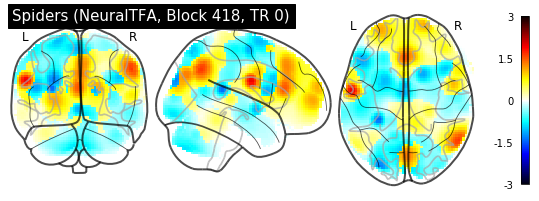

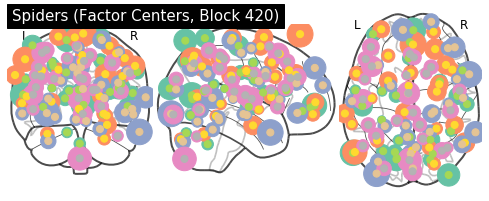

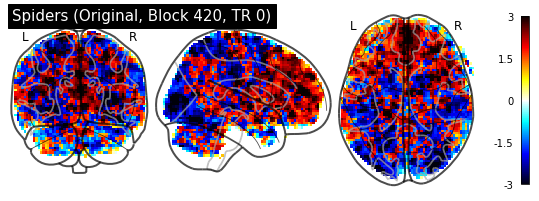

10/08/2020 03:25:32 Reconstruction Error (Frobenius Norm): 1.57919495e+02 out of 1.28193127e+03


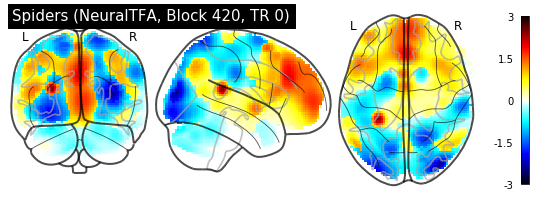

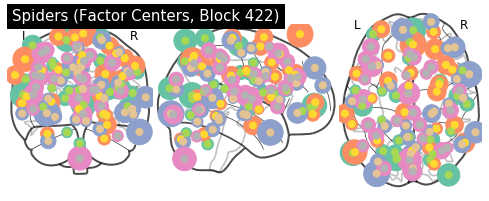

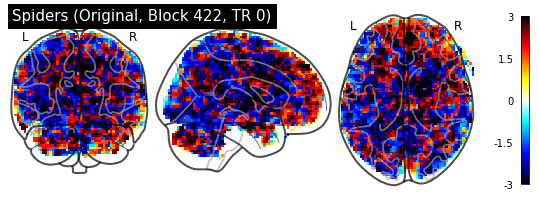

10/08/2020 03:25:36 Reconstruction Error (Frobenius Norm): 1.55991669e+02 out of 1.31451416e+03


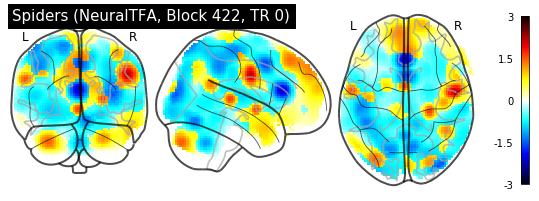

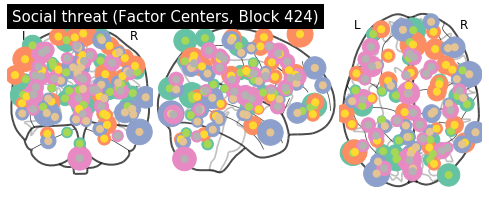

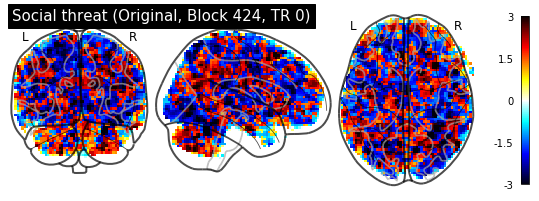

10/08/2020 03:25:41 Reconstruction Error (Frobenius Norm): 1.37937820e+02 out of 1.33830493e+03


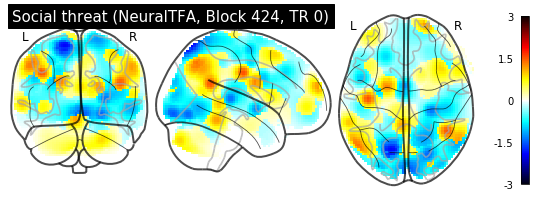

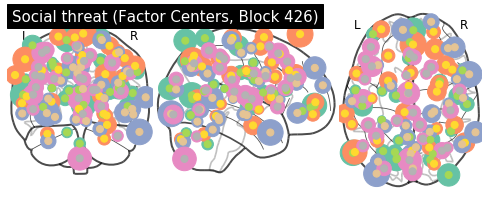

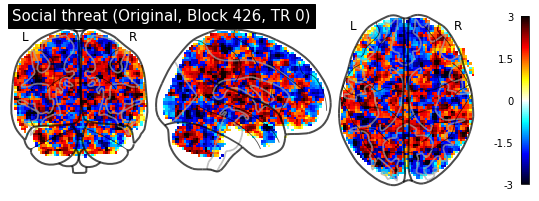

10/08/2020 03:25:46 Reconstruction Error (Frobenius Norm): 1.21062027e+02 out of 1.28382800e+03


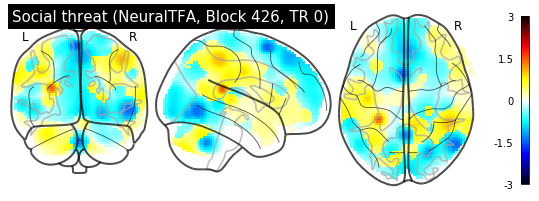

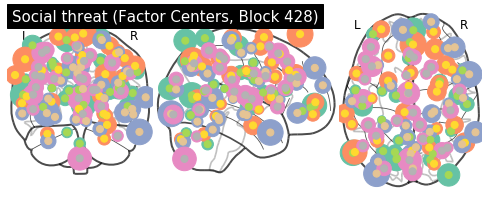

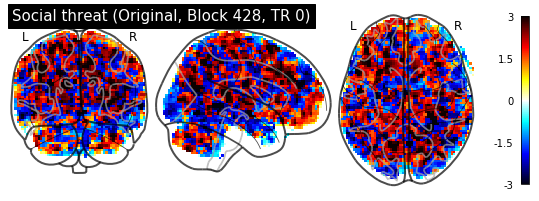

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
10/08/2020 03:25:50 Reconstruction Error (Frobenius Norm): 1.21780907e+02 out of 1.31430334e+03


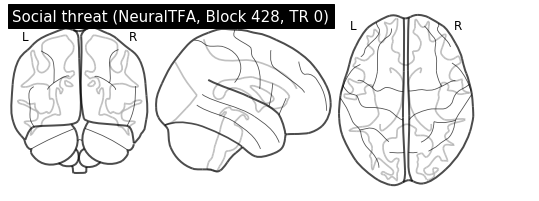

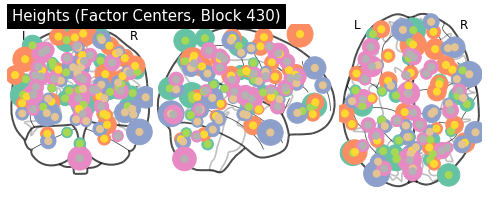

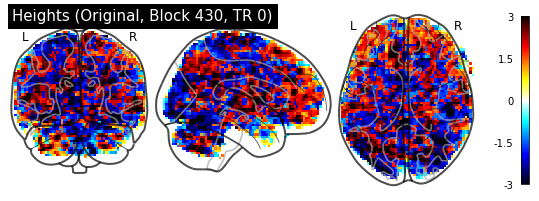

10/08/2020 03:25:55 Reconstruction Error (Frobenius Norm): 1.89958939e+02 out of 1.32383044e+03


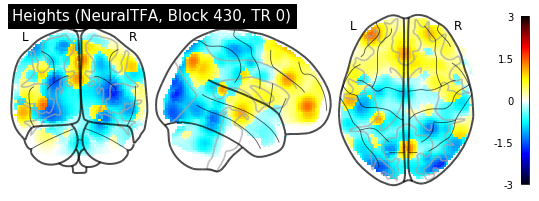

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

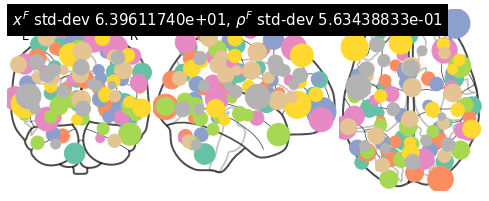

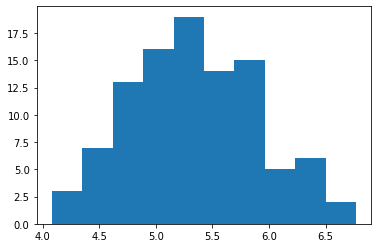

(<nilearn.plotting.displays.OrthoProjector at 0x7fb416076c50>,
 tensor([[-3.1806e+01, -2.9750e+01,  2.4805e+01],
         [ 6.5144e+01, -2.2672e+01,  3.4833e+01],
         [ 3.9456e+01, -4.0513e+01,  1.0596e+01],
         [-1.3543e+00,  5.2255e+01,  3.4859e+00],
         [-2.6765e+01, -1.1694e+00,  4.0296e+01],
         [-2.0380e+01, -7.6048e+01,  6.1991e+01],
         [-5.7617e+00, -5.8276e+01, -5.0382e+01],
         [ 3.6563e+01, -8.0926e+01,  3.5042e+01],
         [-5.0828e+01, -8.1842e+01,  1.4526e+00],
         [ 4.6639e+01,  6.6769e+00,  2.9008e+00],
         [-4.2818e+01, -2.5010e+01,  6.4237e+01],
         [-3.1079e+01,  5.5540e+01,  1.3019e+01],
         [-3.6589e+00,  6.2757e+01,  2.7724e+01],
         [ 1.9338e+01,  6.2480e+00,  1.9130e+01],
         [-2.5498e+01, -6.9615e+01, -1.2491e+01],
         [-1.5350e+01, -6.0125e+01,  1.8122e+01],
         [-2.6171e+01,  4.2640e+00,  6.0206e+01],
         [ 3.2090e+01, -9.9500e+01, -7.8838e-01],
         [-3.0807e+01, -3.7782e+01,  

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

10/08/2020 03:26:34 Average reconstruction error (MSE): 9.09862609e-01
10/08/2020 03:26:34 Average data norm (Euclidean): 1.00760690e+00
10/08/2020 03:26:34 Percent average reconstruction error: 0.317108


(0.9098626093446509, 1.0076068956685986, 0.003171082402700613)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

10/08/2020 03:27:12 Average reconstruction error (MSE): 1.17029900e+03 +/- 4.73438211e+01
10/08/2020 03:27:12 Average data norm (Euclidean): 1.29588641e+03 +/- 5.64196993e+01
10/08/2020 03:27:12 Percent average reconstruction error: 90.353579 +/- 2.46449402e+00


(array([1204.3572998 , 1121.57324219, 1204.53894043, 1203.43725586,
        1174.14611816, 1222.21887207, 1131.07312012, 1195.81835938,
        1170.85668945, 1160.4173584 , 1215.93786621, 1235.68395996,
        1138.67150879, 1201.05456543, 1206.76831055, 1147.06237793,
        1182.24206543, 1188.61633301, 1181.67858887, 1194.33178711,
        1181.90112305, 1190.93884277, 1172.40270996, 1190.35998535,
        1184.95922852, 1229.43334961, 1151.57666016, 1237.49804688,
        1241.71008301, 1215.6973877 , 1203.2376709 , 1178.91784668,
        1161.98657227, 1167.44726562, 1166.45715332, 1193.18115234,
        1158.93884277, 1187.15673828, 1163.95593262, 1120.04223633,
        1175.22973633, 1266.09191895, 1166.62536621, 1320.87768555,
        1159.80090332, 1265.95849609, 1303.30981445, 1161.81713867,
        1156.91137695, 1087.18505859, 1142.71887207, 1202.30627441,
        1160.75366211, 1265.31433105, 1173.56433105, 1200.96252441,
        1166.97021484, 1140.00024414, 1139.49621

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

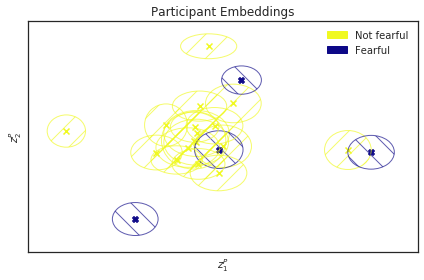

In [31]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

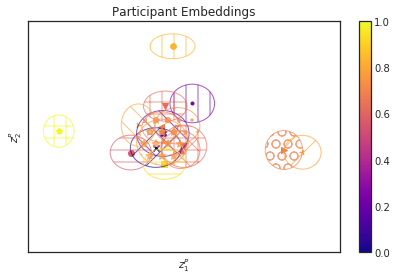

In [32]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

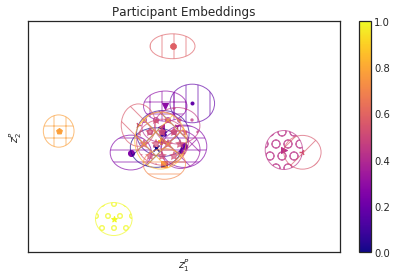

In [33]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

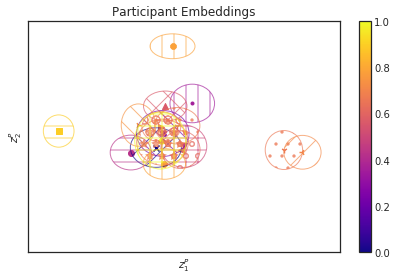

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

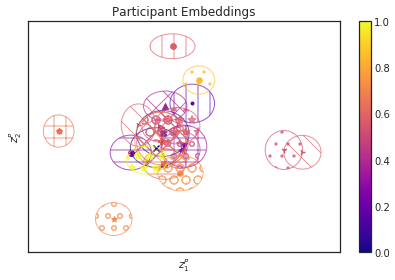

In [35]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')